### Assignment 4
#### Mariam Alabi

Import libraries

In [249]:
import dexpy.factorial
import pandas as pd
import numpy as np

Create matrix

In [250]:
#First argument is the amount of factors(variables), the second parameter is the number of experiments to include in the design
#Returns:	A pandas.DataFrame object containing the requested design.
coffee_design = dexpy.factorial.build_factorial(5 , 2**(5 -1))

coffee_design.columns = ['amount ', 'grind_size ', 'brew_time ', 'grind_type ', 'beans ']
coffee_design

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1
5,-1,1,-1,1,1
6,-1,1,1,-1,1
7,-1,1,1,1,-1
8,1,-1,-1,-1,-1
9,1,-1,-1,1,1


Notably, in this application the variables x4 and x5 can only take two different values, whereas the other
three can take any value on some limited intervals (see above). Therefore, it is only meaningful to have
the 3 quadratic terms x
2
1
, x
2
2
, and x
2
3
. This means we need at least one extra level for the corresponding
variables x1, x2 , and x3 in order to estimate the coefficients for these quadratic terms. In addition to
the two original values −1 and +1, the most natural single extra level to choose is the center value, here
encoded as 0. In terms of Python code for the package dexpy, this can be specified as follows:

In [251]:
center_points = [[0 , 0, 0, -1, -1] ,
[0 , 0, 0 , -1, 1] ,
[0 , 0, 0 , 1 , -1] ,
[0 , 0, 0 , 1 , 1]]
center_points

[[0, 0, 0, -1, -1], [0, 0, 0, -1, 1], [0, 0, 0, 1, -1], [0, 0, 0, 1, 1]]

In [252]:
actual_lows = { 'amount ' : 2.5 , 'grind_size ' : 8, 'brew_time ': 3.5 ,'grind_type ': 'burr ', 'beans ': 'light ' }
actual_highs = { 'amount ' : 4 , 'grind_size ' : 10 , 'brew_time ': 4.5 , 'grind_type ': 'blade ', 'beans ': 'dark ' }
actual_design = dexpy.design.coded_to_actual ( coffee_design , actual_lows , actual_highs )
actual_design

,amount,grind_size,brew_time,grind_type,beans
0,2.5,8.0,3.5,burr,dark
1,2.5,8.0,3.5,blade,light
2,2.5,8.0,4.5,burr,light
3,2.5,8.0,4.5,blade,dark
4,2.5,10.0,3.5,burr,light
5,2.5,10.0,3.5,blade,dark
6,2.5,10.0,4.5,burr,dark
7,2.5,10.0,4.5,blade,light
8,4.0,8.0,3.5,burr,light
9,4.0,8.0,3.5,blade,dark


In [253]:

coffee_design = coffee_design.append(pd.DataFrame (center_points * 2, columns = coffee_design .columns ))
coffee_design.index = np.arange (0 , len( coffee_design ) )
coffee_design

/var/folders/zq/7w6ngfy92097zy2dy24pp7v80000gn/T/ipykernel_47847/2607267925.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coffee_design = coffee_design.append(pd.DataFrame (center_points * 2, columns = coffee_design .columns ))


,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1
5,-1,1,-1,1,1
6,-1,1,1,-1,1
7,-1,1,1,1,-1
8,1,-1,-1,-1,-1
9,1,-1,-1,1,1


In [254]:
actual_lows = { 'amount ' : 2.5 , 'grind_size ' : 8, 'brew_time ': 3.5 ,
'grind_type ': 'burr ', 'beans ': 'light ' }
actual_highs = { 'amount ' : 4 , 'grind_size ' : 10 , 'brew_time ': 4.5 ,
'grind_type ': 'blade ', 'beans ': 'dark ' }
actual_design = dexpy.design.coded_to_actual ( coffee_design , actual_lows , actual_highs )
actual_design

,amount,grind_size,brew_time,grind_type,beans
0,2.50,8.0,3.5,burr,dark
1,2.50,8.0,3.5,blade,light
2,2.50,8.0,4.5,burr,light
3,2.50,8.0,4.5,blade,dark
4,2.50,10.0,3.5,burr,light
5,2.50,10.0,3.5,blade,dark
6,2.50,10.0,4.5,burr,dark
7,2.50,10.0,4.5,blade,light
8,4.00,8.0,3.5,burr,light
9,4.00,8.0,3.5,blade,dark


### 2.5 Task A1 - Determine and visualize design matrices
(i) Modify the code snippets above to create a design based on a pure 25−2
fractional factorial design
without any additional central points. How many experiments are created in this case?

(ii) If you have not already done it, just pull together the code snippets above to create and print out a
design matrix based on combining a 25−1
fractional factorial design with the following central points in
duplicate:

In [255]:
#(i)
coffee_design_2 = dexpy.factorial.build_factorial(5 , 2**(5 -2))
print(f"{len(coffee_design_2)} experiemnts are created")
coffee_design_2.columns = ['amount ', 'grind_size ', 'brew_time ', 'grind_type ', 'beans ']
coffee_design_2
actual_design_2 = dexpy.design.coded_to_actual ( coffee_design_2 , actual_lows , actual_highs )
actual_design_2


8 experiemnts are created


,amount,grind_size,brew_time,grind_type,beans
0,2.5,8.0,3.5,blade,dark
1,2.5,8.0,4.5,blade,light
2,2.5,10.0,3.5,burr,dark
3,2.5,10.0,4.5,burr,light
4,4.0,8.0,3.5,burr,light
5,4.0,8.0,4.5,burr,dark
6,4.0,10.0,3.5,blade,light
7,4.0,10.0,4.5,blade,dark


In [256]:
coffee_design
# coffee_design = actual_design
coffee_design

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1
5,-1,1,-1,1,1
6,-1,1,1,-1,1
7,-1,1,1,1,-1
8,1,-1,-1,-1,-1
9,1,-1,-1,1,1


### 2.6 Task A2 - Collect response values y(n) and add them to your dataset
In a real coffee tasting project (actually performed and reported) the design matrix created in Task
A1(ii) resulted in the 24 response (score) values y(n) shown below. Run again your code for A1(ii) and
make sure it produces 24 experiments. Then run the following code in order to insert the values as a
new column in the Pandas dataframe coffee_design

In [257]:
#this is the y value
coffee_design ['taste_rating'] = [
4.4 , 2.6 , 2.4 , 8.6 , 1.6 , 2.8 , 7.2 , 3.4 ,
6.8 , 3.4 , 3.8 , 9.0 , 5.2 , 3.6 , 8.2 , 7.0 ,
5.4 , 6.8 , 3.6 , 5.4 , 4.8 , 6.2 , 4.4 , 5.8
]
coffee_design

,amount,grind_size,brew_time,grind_type,beans,taste_rating
0,-1,-1,-1,-1,1,4.4
1,-1,-1,-1,1,-1,2.6
2,-1,-1,1,-1,-1,2.4
3,-1,-1,1,1,1,8.6
4,-1,1,-1,-1,-1,1.6
5,-1,1,-1,1,1,2.8
6,-1,1,1,-1,1,7.2
7,-1,1,1,1,-1,3.4
8,1,-1,-1,-1,-1,6.8
9,1,-1,-1,1,1,3.4


### 2.7 Task A3 - Fit coefficients in a plain linear regression model using OLS
After completing the dataset collection, we are ready to fit the coefficient vector w = [w0 w1 ...]
T of
model ˆy = wT z that we choose. For example we may use a plain linear model where z does not contain
any interaction terms or quadratic terms. In other words ˆy = wT z = w0 + w1x2 + ... + w5x5 in this case
so z = [1 x1 ... x5]
T
.
The fitting of the coefficient vector w is done by the ordinary least squares (OLS) method that minimizes
the function
JOLS(w) = X
N
n=1
(y(n) − yˆ(n))2 =
X
N
n=1
(y(n) − wT
z(n))2
.
This means that OLS finds the coefficient vector wOLS that minimizes the sum of squared prediction
errors. Searching for the minimum by solving the system of equations ∂JOLS
∂w = 0 gives the closed form
solution
wOLS = (Z
TZ)
−1Z
T y
where y = [y(1) y(2) ... y(N)]T and where row z(n)
T of the matrix Z corresponds to experiment x(n).
In this particular case of a purely linear model, this row can be written
z(n)
T = [1 x1(n) x2(n) ... x5(n)]T
but it can easy be extended, for example with all possible interactions terms as in this simplified example
that includes only 3 variables:
z(n)
T = [1 x1(n) x2(n) x3(n) x1x2(n) x1x3(n) x2x3(n)]T
Note: In the examples here, the row z(n)
T
contains the constant value one as a first element. This is
to match the intercept coefficient w0 in the model. If you want to have a model without any intercept
term (meaning that you are assuming a linear model that passes through the origin), then this constant
values should be removed from z(n)
T
.
Use the following code to determine the coefficient vector w in the model ˆy = wT z for the special case of
a plain linear model where z does not contain any interaction terms or quadratic terms. In other words
yˆ = wT z = w0 + w1x2 + ... + w5x5 in this case so z = [1 x1 ... x5]
T
.

In [258]:
coffee_design_as_np_array = coffee_design . to_numpy () # Convert from pandas to numpy array
#get the fifth column of the array 
y_np_array = coffee_design_as_np_array [: ,5]
y_np_array = y_np_array . reshape ( -1 ,1) # Reshape to column 2D numpy array
#0:5 after the comma (0:5) indicates that we want to select columns 0 through 4 (inclusive).
X_np_array = coffee_design_as_np_array [: ,0:5] # Examples as rows
# print(X_np_array)

# LEAST SQUARES CLOSED FORM SOLUTION w= inv (Z '*Z)*Z '*y
# Extend X_np_array with one extra column for the intercept
#gets the shape of an array as [rows][columns]
shapeX = X_np_array.shape
#gets the number of rows
nrows = shapeX [0]
#create array of size (nrows, 1), then C concatenates it with X_np
Z = np .c_[ np.ones (( nrows , 1) ), X_np_array]# add x_0 = 1 to each instance (row)
print(Z[0])
# to include an intercept term w_0 in the model
# Calculate w= inv (Z '*Z ')*Z '*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z)
#Matrix multiplication
ZtransposeZ = np . matmul ( Ztranspose ,Z)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
w_np_array = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , y_np_array )) # column vector
print ( w_np_array )

[ 1. -1. -1. -1. -1.  1.]
[[ 5.1       ]
 [ 0.875     ]
 [-0.125     ]
 [ 1.2       ]
 [-0.13333333]
 [ 0.45      ]]


### 2.8 Task A4 - Interpretation of the fitted coefficients
Based on the magnitudes (ignore their signs) of the estimated coefficients obtained in A2 above:

(i) What is your conclusion regarding which of the five variables xi seem most influential on the response
(score) value y?

(ii) Why are the magnitudes of the estimated coefficients directly comparable when using the coded
values {−1, 0, +1}? Why is this not the case if instead the actual values are used (which are of different
types eg. oz, mm, hours, and therefore on different scales) to estimate the model coefficients?

i) x3 Brew time


ii) They are not normalized values, and therefore the most influential variable would be that with the largest range

### 2.9 Task A5 - Refined analysis using interaction terms
Repeat Tasks A2 and A3 after extending the model to a model that includes interaction terms but no
pure quadratic terms. Confirm that such a model has 16 parameters (coefficients).
Tip: The following lines of Python code should give you an idea how to include all the interaction terms
in the model. Notably, here only the inclusion of two of the desired terms are shown. Thus on lines 2
and 3 in this code snippet, a new column is introduced in the matrix Z_np_array that corresponds to a
particular interaction term.

In [259]:
Z_np_array = np.c_[ np . ones (( nrows , 1) ) , X_np_array ] # add x0 = 1 to each instance (row )


def mul_int(arr_z, arr_x, x, y):
    arr_z = np.c_[ arr_z , arr_x [: ,x]* arr_x [: ,y]]
    return arr_z

interactions =[[0,1],
               [0,2],
               [0,3],
               [0,4],
               [1,2],
               [1,3],
               [1,4],
               [2,3],
               [2,4],
               [3,4]]

for i in interactions: 
    Z_np_array = mul_int(Z_np_array, X_np_array, i[0], i[1])


print(Z_np_array.shape)

# to include an intercept term w_0 in the model
# Calculate w= inv (Z '*Z ')*Z '*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z_np_array)
#Matrix multiplication
ZtransposeZ = np . matmul ( Ztranspose ,Z_np_array)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
w_np_array = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , y_np_array )) # column vector
print ( w_np_array )


(24, 16)
[[ 5.1       ]
 [ 0.875     ]
 [-0.125     ]
 [ 1.2       ]
 [-0.13333333]
 [ 0.45      ]
 [ 0.25      ]
 [-0.075     ]
 [-0.175     ]
 [-1.325     ]
 [ 0.375     ]
 [-0.725     ]
 [ 0.375     ]
 [ 0.75      ]
 [ 0.15      ]
 [ 0.08333333]]


(i) What interaction terms are most influential according to the model fitted here? Is there any variable
xi where the corresponding weight wi has one sign while at the same time the corresponding interaction
weight wij has the opposite sign?


(ii) Explain why the inclusion of the interaction terms may create difficulties understanding the actual
net effect of for any variable xi on the response y. Tip: Consider the the sum wixi + wijxixj and its
partial derivative with respect to input xi: 

∂ wixi + wijxixj / ∂xi = wi + wijxj


Apparently the change in the response y when xi
is slightly increased is challenging to express in simple
words. This is because the influence of variable xi on the response y is context dependent. For example
when xj ≈ 0, then the term wijxixj can be ignored even if wij is far from zero. In other words, the
influence of xi on y depends partly on the values of other variables like xj .

(i) Most influential is x3: brew time

x1 is positive, but all its interactions are negative 
x2 is negative (-0.125), x12 (amt coffee x grind size), x24(grind size x grind type) is positive
x3 is positive, x13 (amt cof x brew time) is neg
x4 is neg, x24 (grindsize x grindtype), x34 (brewtime x grindtype), x45 (coffee beans x grindtype) are pos 
x5 is pos, x25 (grindsize x coffee beans) is neg

ii) the interactions are codependant on eachother the value of xi depends on the value of xij and vice versa. you have to try all different environments to truly understand the x_ij interaction, would could be expensive and time consuming



### 3 PART B: D-Optimal Experimental Design
The basic result from the theory of D-optimal design is as follows: In order to reduce the variability in the
OLS estimate wOLS of the coefficient vector for a pre-defined number of experiments N, the experiments
should be chosen so that the model matrix Z employed should maximize the determinant |Z
TZ|. For
example, row n in the matrix Z equals
z(n)
T = [1 x1(n) x2(n) x1(n)x2(n) (x1(n))2
(x2(n))2
]
T
in the special case we are considering a full quadratic response model (for more details see below).
#### 3.1 A First Example - Chemical Process Analysis
Here follows a first example from Chemical Process Analysis, showing how D-optimal experimental design
can be used in practice.
##### 3.1.1 Problem Description
Assume you are trying to improve the yield of a chemical process by adjusting the following two input
variables.
x1 = Reaction time (40-50 minutes) Note: Real value
x2 = Temperature (80-90 ◦C) Note: Real value
##### 3.1.2 Design Choice: D-Optimal Design
Assume that due to the great expense of each experiment, in total only 6 experiments can be performed.
Therefore you choose to employ a D-optimal design in order to fit a fully quadratic model.
##### 3.1.3 Creating a D-Optimal Design in Python
The required D-optimal design can easily be created in Python using build_optimal in the package
dexpy. In this case a full quadratic model looks as follows: y = w0 + w1x1 + w2x2 + w12x1x2 + w11x
2
1 +
w12x
2
1
. Thus the number of parameters to tune is actually equal to six. The minimum number of
experiments to perform is therefore six and to make a design consisting of six experiments, we specify
that by the parameter specification run_count=6 as shown in the code snippet below. Here follows a
complete code snippet that creates and then presents the desired design.

### <u>(i) Create D-Optimal Design for a full quadratic model for six experiments when the number of variables (factors) are d = 2.</u> 

In [260]:
import dexpy . optimal
from dexpy . model import ModelOrder
#D- optimal design of quadratic model
no_of_factors =2
reaction_design = dexpy . optimal . build_optimal ( no_of_factors , run_count =6 , order = ModelOrder . quadratic ) 

# Print out of the design and conversion to real experimental values to use in the actual experimentto be performed
column_names = ['time ', 'temp ']
actual_lows = { 'time ': 40 , 'temp ': 80 }
actual_highs = { 'time ': 50 , 'temp ': 90 }
reaction_design . columns = column_names
print ( dexpy . design . coded_to_actual ( reaction_design , actual_lows , actual_highs ) )

       time       temp 
0  40.000000  90.000000
1  40.000000  85.454545
2  44.545455  80.000000
3  50.000000  90.000000
4  50.000000  80.000000
5  40.000000  80.000000


##### 3.1.4 Graphical visualization of the D-Optimal Design in Python

As you can see, the runs are now arranged in a less structured manner compared to the standard designs
shown before. One can use the Python code provided below to understand graphically how the points
are spread out throughout the space.

### <u>(ii) Visualize the design made in (i) in terms of both a Table/Matrix and a graph that illustrate the experiments selected to be performed.</u> 

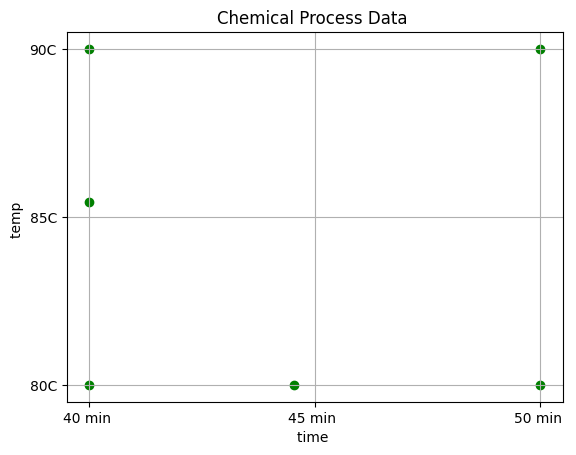

In [261]:
import matplotlib.pyplot as plt
reaction_design_np_array = reaction_design . to_numpy ()
fig = plt . figure ()
ax = fig . add_subplot ()

# plotting the points
plt .scatter ( reaction_design_np_array [: ,0] , reaction_design_np_array [: ,1] , color ='green', marker='o')
plt . xlabel ('time ')
plt . ylabel ('temp ')
ax . set_xticks ([ -1 , 0, 1])
ax . set_xticklabels ([ '40 min ', '45 min ', '50 min '])
ax . set_yticks ([ -1 , 0, 1])
ax . set_yticklabels ([ '80C', '85C', '90C'])
ax . grid ()
plt . title ('Chemical Process Data ')
plt . show ()

##### 3.1.5 Task B1 - D-optimality is about maximizing |ZTZ|
We can calculate the D-optimality of this design, which is the determinant of the matrix |Z
TZ|, where
the row n in Z equals [1 x1(n) x2(n) (x1(n))2
(x2(n))2 x1(n)x2(n)]. This can be done based on the
following code snippet.

### <u>(iii) Calculate the maximally large determinant |ZTZ| where each row in the matrix Z corresponds to one of the 6 experiments selected. Tip: You are expected to get a value for this determinant close to 264.6 (sometimes lower).

In [262]:
import numpy as np
X_np_array = reaction_design_np_array

# Add columns corresponding to a full quadratic model to the design matrix Z_np_array
shapeX = X_np_array . shape
nrows = shapeX [0]
Z_np_array = np . c_ [ np . ones (( nrows , 1) ) , X_np_array ] # add x0 = 1 to each instance (row )
#the quadratics 
Z_np_array = np . c_ [ Z_np_array , X_np_array [: ,0]* X_np_array [: ,0]]
Z_np_array = np . c_ [ Z_np_array , X_np_array [: ,1]* X_np_array [: ,1]]
Z_np_array = np . c_ [ Z_np_array , X_np_array [: ,0]* X_np_array [: ,1]]
Z_np_array
#get the determiniate 
det_Z_np_array = np . linalg . det ( np . matmul ( np . transpose ( Z_np_array ) , Z_np_array ))
det_Z_np_array
print ("|(Z’Z)| for optimal design :", det_Z_np_array )

'''
a small deteriminate means that the parameters are poorly estimated 
large determinate means teh parameters are well estimated 
'''

|(Z’Z)| for optimal design : 247.6415241223434


'\na small deteriminate means that the parameters are poorly estimated \nlarge determinate means teh parameters are well estimated \n'

### <u>(iv) Create and visualize a D-Optimal Design for a full quadratic model when the number of experiments are increased from N = 6 to N = 10. This gives you a good visual overview how the designed (selected) experiments are spread out.

In [263]:
reaction_design = dexpy . optimal . build_optimal ( no_of_factors , run_count =10 , order = ModelOrder . quadratic ) 

# Print out of the design and conversion to real experimental values to use in the actual experimentto be performed
column_names = ['time ', 'temp ']
actual_lows = { 'time ': 40 , 'temp ': 80 }
actual_highs = { 'time ': 50 , 'temp ': 90 }
reaction_design . columns = column_names
matrix = dexpy . design . coded_to_actual ( reaction_design , actual_lows , actual_highs )
print ( matrix )

duplicates = matrix.duplicated()

dup_rows = matrix.loc[duplicates]

print(f"{dup_rows} is duplicated (performed twice)")

       time       temp 
0  50.000000  90.000000
1  50.000000  80.000000
2  40.000000  80.000000
3  50.000000  84.545455
4  50.000000  90.000000
5  40.000000  84.545455
6  44.545455  80.000000
7  40.000000  90.000000
8  44.545455  90.000000
9  45.454545  85.454545
   time   temp 
4   50.0   90.0 is duplicated (performed twice)


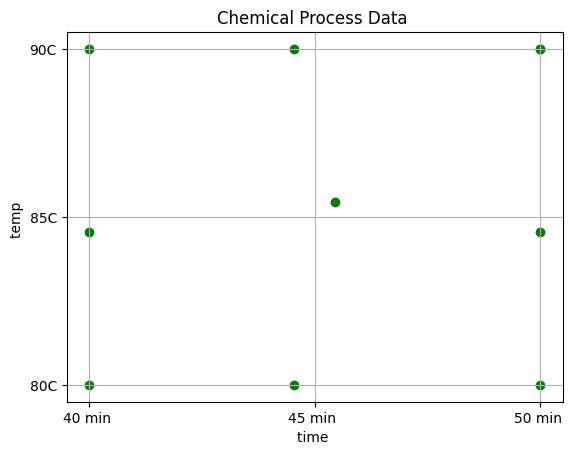

In [264]:
import matplotlib.pyplot as plt
reaction_design_np_array = reaction_design . to_numpy ()
fig = plt . figure ()
ax = fig . add_subplot ()

# plotting the points
plt .scatter ( reaction_design_np_array [: ,0] , reaction_design_np_array [: ,1] , color ='green', marker='o')
plt . xlabel ('time ')
plt . ylabel ('temp ')
ax . set_xticks ([ -1 , 0, 1])
ax . set_xticklabels ([ '40 min ', '45 min ', '50 min '])
ax . set_yticks ([ -1 , 0, 1])
ax . set_yticklabels ([ '80C', '85C', '90C'])
ax . grid ()
plt . title ('Chemical Process Data ')
plt . show ()

#### 3.2 A Second Example - Paper Helicopter Design
An illustrative application example of experimental design for OLS is the search for the optimal paper
helicopter design as described by the article by Erik Barry Erhardt (see your course literture).
##### 3.2.1 Task B2 - OLS fitting of Paper Helicopter Data
Inspired by the Paper Helicopter article by Erik Barry Erhardt, perform OLS fitting to determine the
coefficient of the quadratic Surface Response Model

<centre> y = w0 + w1x1 + w2x2 + w12x1x2 + w11x1^2 + w12x1^2 </centre>

using the following paper helicopter flying data (where y denotes the flying time)

In [265]:
import numpy as np
X =[[ -1 , -1] ,[1 , -1] ,[ -1 ,1] ,[1 ,1] ,[0 ,0] ,[0 ,0] ,[0 ,0] ,[1 ,0] ,[ -1 ,0] ,[0 ,1] ,[0 , -1]]
y =[13.65 ,13.74 ,15.48 ,13.53 ,17.38 ,16.35 ,16.41 ,12.51 ,15.17 ,14.86 ,11.85]
X= np . asarray (X)
y= np . asarray (y). reshape ( -1 ,1)



shapeX = X.shape
#gets the number of rows
nrows = shapeX [0]
print(nrows)

Z = np .c_[ np.ones (( nrows , 1) ), X]# add x_0 = 1 to each instance (row)
Z= np . c_ [ Z, X [: ,0]* X [: ,1]]
Z= np . c_ [ Z, X [: ,0]* X [: ,0]]
Z= np . c_ [ Z, X [: ,1]* X [: ,1]]



# to include an intercept term w_0 in the model
# Calculate w= inv (Z '*Z ')*Z '*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z)
#Matrix multiplication
ZtransposeZ = np . matmul ( Ztranspose ,Z)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
w_np_array = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , y )) # column vector
print ( w_np_array )

11
[[15.95157895]
 [-0.75333333]
 [ 0.77166667]
 [-0.51      ]
 [-0.96894737]
 [-1.45394737]]


### 3.2.2 Task B3 - Fit Simulated Paper Helicopter Data Using a D-Optimal Design

As explained in steps 1-3 below, use the coefficient vector wsimulator found in B2 above to simulate the
flying time of new helicopters. Use this approach to study the potency of D-Optimal design. Assume
that we only have the time budget to design N=6 paper helicopters. Then it is not possible to use a
Central Composite Design, as such a design would need at least 22+4 = 8 designs. Then instead perform
the following steps.


#### <u>1. Make a D-optimal design that consists of only N = 6 experiments x(n) for a two-factor quadratic model.</u>

In [266]:
no_of_factors =2
reaction_design = dexpy . optimal . build_optimal ( no_of_factors , run_count =6 , order = ModelOrder . quadratic ) 




2. Use the weight vector found in B2, here denoted

wsimulator = [w0 w1 w2 w12 w11 w22]T

to simulate the flying time of the 6 new paper helicopters designed in Step 1 by computing
y(n) = w0 + w1x1(n) + w2x2(n) + w12x1(n)x2(n) + w11(x1(n))2 + w22(x2(n))2 + ϵ(n).
Here ϵ(n) is a random number drawn from a zero mean normal distribution with standard deviation
σ = 0.1. Thus, this should result in 6 training examples (x(n), y(n)), n=1,2,..,6.

In [267]:
#convert to numpy
X = reaction_design.to_numpy()
shapeX = X.shape

#get error values
err = [np.random.normal(0, 0.1) for _ in range(6)]
err = np.array(err)
err = err.reshape(-1,1)

nrows = shapeX[0]
#add rows of 1
Z = np .c_[ np.ones (( nrows , 1) ), X]
Z = np.c_[Z, X [: ,0]* X [: ,1]]
Z = np.c_[Z, X [: ,0]* X [: ,0]]
Z = np.c_[Z, X [: ,1]* X [: ,1]]
Z = np.c_[Z, err]



#add a 1 to account for the error term
W_simulator = np.transpose(w_np_array)
W_simulator = np.c_[W_simulator, 1]
W_simulator = np.transpose(W_simulator)


V = np.matmul(Z, W_simulator)
#this is y(n)
print(V)



[[12.49189877]
 [14.06146364]
 [15.60994545]
 [12.86128521]
 [13.65392464]
 [12.79452053]]


3. Use the training data set (x(n), y(n)) generated in Step 2 to fit the parameter vector v = [v0 v1 v2 v12 v11 v22]
T
of the quadratic model y = v0 + v1x1 + v2x2 + v12x1x2 + v11x
2
1 + v22x
2
2 using the OLS method. In the
following, name the resulting fitted parameter vector as vD-optimal.

In [268]:
# Calculate w= inv (Z '*Z ')*Z '*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z)
#Matrix multiplication
ZtransposeZ = np . matmul ( Ztranspose ,Z)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
w_d_optimal = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , V )) # column vector
print ( w_d_optimal )

[[  16.]
 [  -2.]
 [   2.]
 [ -16.]
 [  -8.]
 [   0.]
 [-128.]]


In [269]:
print(f"w_d_optimal is: {w_d_optimal}")
print(f"w simulator is: {W_simulator}")


#get the difference between the vectors 
vect_diff = np.array(list(map(lambda x,y: x-y, w_d_optimal, W_simulator)))

print(f"The difference between w_d_optimal and w_simulator is: {vect_diff}")

"the difference between the vectors is large, concluding that wd optimal does not agree with the true parameter that was used to simulate the data"

w_d_optimal is: [[  16.]
 [  -2.]
 [   2.]
 [ -16.]
 [  -8.]
 [   0.]
 [-128.]]
w simulator is: [[15.95157895]
 [-0.75333333]
 [ 0.77166667]
 [-0.51      ]
 [-0.96894737]
 [-1.45394737]
 [ 1.        ]]
The difference between w_d_optimal and w_simulator is: [[ 4.84210526e-02]
 [-1.24666667e+00]
 [ 1.22833333e+00]
 [-1.54900000e+01]
 [-7.03105263e+00]
 [ 1.45394737e+00]
 [-1.29000000e+02]]
